## Bank Loan

**Ouvrons le bloc de données, appelez-le "df".**

In [1]:
import pandas as pd

data = pd.read_csv('bank.csv',delimiter=';')

df=pd.DataFrame(data)

df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


**Supprimons les colonnes suivantes :**
**['default','poutcome','y','housing','contact','day','month','duration','campaign','pdays','previous']**

**Trouvons le nombre de lignes et de colonnes.**

In [2]:
df=df.drop(['default','poutcome','y','housing','contact','day','month','duration','campaign','pdays','previous'],axis=1)
df

,age,job,marital,education,balance,loan
0,58,management,married,tertiary,2143,no
1,44,technician,single,secondary,29,no
2,33,entrepreneur,married,secondary,2,yes
3,47,blue-collar,married,unknown,1506,no
4,33,unknown,single,unknown,1,no
...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no
45207,71,retired,divorced,primary,1729,no
45208,72,retired,married,secondary,5715,no
45209,57,blue-collar,married,secondary,668,no


In [3]:
import numpy as np

rows=len(df.index)
cols=len(df.columns.values)

**Trouvons le type de données de chacune des colonnes.**

In [4]:
data_type=df.dtypes

data_type

age           int64
job          object
marital      object
education    object
balance       int64
loan         object
dtype: object

**Trouvons le nombre total de valeurs manquantes.**

In [5]:
import numpy as np

df=df.replace('unknown', np.nan)
    
sum_miss=np.sum(np.sum(df.isnull(),axis=1))

sum_miss

2145

In [6]:
df.head()

,age,job,marital,education,balance,loan
0,58,management,married,tertiary,2143,no
1,44,technician,single,secondary,29,no
2,33,entrepreneur,married,secondary,2,yes
3,47,blue-collar,married,NaN,1506,no
4,33,NaN,single,NaN,1,no


**Trouvons le nombre de personnes ayant un niveau d'éducation 'secondaire'.**

In [7]:
secondary_edu=df[df['education']=='secondary'].education.count()

print("TOTAL NUMBER OF PEOPLE WITH SECONDARY EDUCATION: " + str(secondary_edu))

TOTAL NUMBER OF PEOPLE WITH SECONDARY EDUCATION: 23202


**Comparons entre la moyenne du solde des personnes mariées et célibataires**

In [8]:
df.head()

df.marital.unique()

married=df[df['marital']=='married']['balance'].mean()
single=df[df['marital']=='single']['balance'].mean()



print("MARRIED AVG : " + str(married))
print("SINGLE AVG : " + str(single))

MARRIED AVG : 1425.9255897699713
SINGLE AVG : 1301.4976544175138


**Trouvons la moyenne et l'écart-type du solde de chaque niveau d'études.**

In [21]:
edu_group=df.groupby('education')

edu_group.agg(['mean','std'])['balance']

,mean,std
education,,
primary,1250.949934,2690.743991
secondary,1154.880786,2558.256739
tertiary,1758.416435,3839.088305


**Trouvons la moyenne et l'écart-type du solde de chaque emploi.**

In [10]:
df.job.unique()

job_group=df.groupby('job')

job_group.agg(['mean','std'])['balance']

,mean,std
job,,
admin.,1135.838909,2641.962686
blue-collar,1078.826654,2240.523208
entrepreneur,1521.470074,4153.442626
housemaid,1392.395161,2984.692098
management,1763.616832,3822.965605
retired,1984.215106,4397.044177
self-employed,1647.970868,3684.259573
services,997.088108,2164.493505
student,1388.060768,2441.703526


**Le solde moyen pour les différents groupes d'éducation et état matrimonial.**

In [11]:
group=df.groupby(['education','marital'])

group.agg(['mean'])['balance']

mean
education marital              
primary   divorced  1137.680851
          married   1286.655547
          single    1131.215709
secondary divorced   902.772647
          married   1251.750254
          single    1060.546773
tertiary  divorced  1700.917063
          married   1848.779341
          single    1643.351210

**Comparons le nombre de personnes qui ont eu un prêt (marié vs célibataire).**

In [12]:
loan_yes=df[df['loan']=='yes']

loan_single=loan_yes[loan_yes['marital']=='single'].loan.count()
loan_married=loan_yes[loan_yes['marital']=='married'].loan.count()
loan_divorced=loan_yes[loan_yes['marital']=='divorced'].loan.count()

print("TOTAL NUMBER OF LOANS TAKEN BY SINGLE POPULATION: " + str(loan_single))
print("TOTAL NUMBER OF LOANS TAKEN BY MARRIED POPULATION: " + str(loan_married))


TOTAL NUMBER OF LOANS TAKEN BY SINGLE POPULATION: 1663
TOTAL NUMBER OF LOANS TAKEN BY MARRIED POPULATION: 4660


**Les emplois avec le solde moyen le plus élevé.**

In [22]:
max_mean = df.groupby(['job']).agg(['mean'])['balance']
max_mean.sort_values('mean',ascending=False)


,mean
job,
retired,1984.215106
management,1763.616832
self-employed,1647.970868
unemployed,1521.745971
entrepreneur,1521.470074
housemaid,1392.395161
student,1388.060768
technician,1252.632092
admin.,1135.838909


**Le niveau d'éducation avec le plus grand nombre de prêts.**

In [23]:
loan_yes=df[df['loan']=='yes']

loan_yes.groupby('education').education.count()

education
primary      1024
secondary    4303
tertiary     1784
Name: education, dtype: int64

**Créons l'histogramme des âges des personnes mariées.**

Text(0.5, 0, 'AGE GROUP')

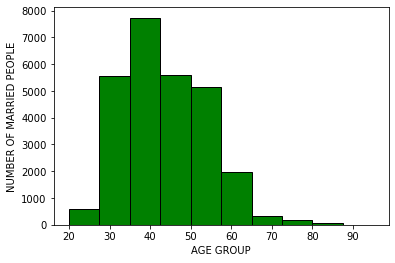

In [24]:
import matplotlib.pyplot as plt

df[df.marital=='married']['age'].plot.hist(edgecolor='k',color='green')

plt.ylabel('NUMBER OF MARRIED PEOPLE')
plt.xlabel('AGE GROUP')


**Créons une figure qui montre le nombre de prêts dans chaque catégorie d'emploi (essayez un tracé horizontal).**

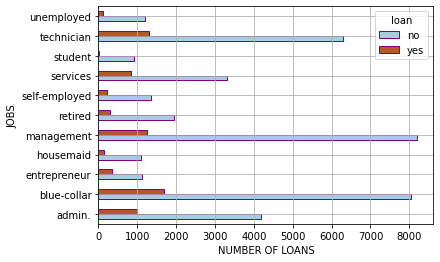

In [16]:
df.groupby('job').loan.value_counts().unstack().plot.barh(colormap='Paired',edgecolor='purple')

plt.ylabel('JOBS')
plt.xlabel('NUMBER OF LOANS')
plt.grid(zorder=0)


**Visualisez la relation entre l'âge et l'équilibre.**

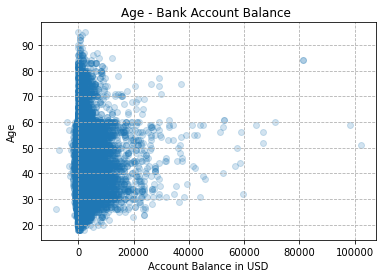

In [25]:
plt.scatter(df['balance'], df['age'],alpha=0.2)
plt.title('Age - Bank Account Balance ')
plt.xlabel('Account Balance in USD')
plt.ylabel('Age')
plt.grid(linestyle='--')

**Comparez la répartition par âge pour différents statuts matrimoniaux.**

Text(0.5, 1.0, 'AGE DISTRIBUTION - MARRIED')

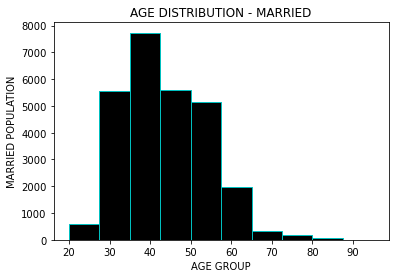

In [26]:
df[df.marital=='married']['age'].plot.hist(edgecolor='c',color='black')

plt.ylabel('MARRIED POPULATION')
plt.xlabel('AGE GROUP')
plt.title('AGE DISTRIBUTION - MARRIED')


Text(0.5, 1.0, 'AGE DISTRIBUTION - DIVORCED')

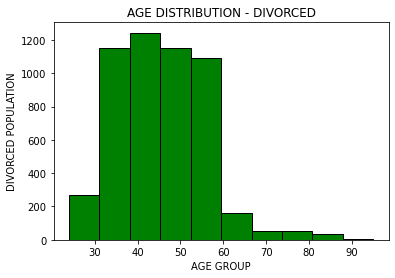

In [19]:
df[df.marital=='divorced']['age'].plot.hist(edgecolor='k',color='green')

plt.ylabel('DIVORCED POPULATION')
plt.xlabel('AGE GROUP')
plt.title('AGE DISTRIBUTION - DIVORCED')

Text(0.5, 1.0, 'AGE DISTRIBUTION - SINGLE')

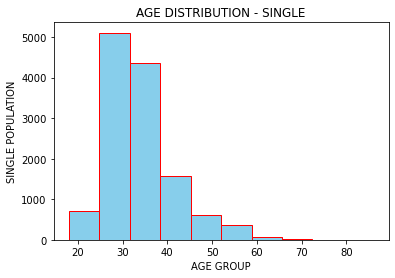

In [20]:
df[df.marital=='single']['age'].plot.hist(edgecolor='r',color='skyblue')

plt.ylabel('SINGLE POPULATION')
plt.xlabel('AGE GROUP')
plt.title('AGE DISTRIBUTION - SINGLE')